#### 라이브러리와 app 데이터 세트 로딩

In [1]:
import numpy as np
import os
import pandas as pd
import gc
import time
import matplotlib.pyplot as plt
import seaborn as sns
#import warning
%matplotlib inline

#warning.ignorewarning(...)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [2]:
os.getcwd()

'C:\\Users\\JunDragon\\kaggel\\HCDR'

In [3]:
app_train = pd.read_csv('C:/Users/JunDragon/kaggel/HCDR/application_train.csv')
app_test = pd.read_csv('C:/Users/JunDragon/kaggel/HCDR/application_test.csv')

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

#### TARGET 값 분포 및 AMT_INCOME_TOTAL 값 Histogram
* TARGET값 별 분포도, Pandas, Matplotlib, Seaborn으로 histogram 표현

In [6]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

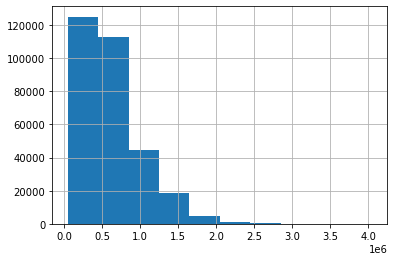

In [7]:
app_train['AMT_CREDIT'].hist()
#plt.hist(app_train['AMT_INCOME_TOTAL'])

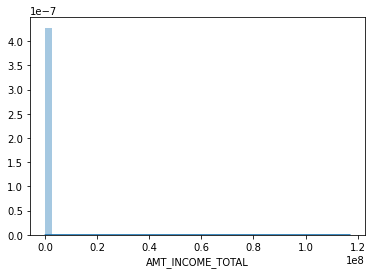

In [8]:
sns.distplot(app_train['AMT_INCOME_TOTAL'])

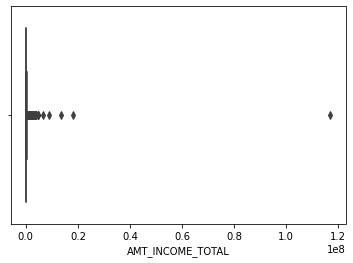

In [9]:
sns.boxplot(app_train['AMT_INCOME_TOTAL'])

#### AMT_INCOME_TOTAL이 1000000 이하인 값에 대한 분포도 
* boolean indexing으로 filtering 후 histogram 표현

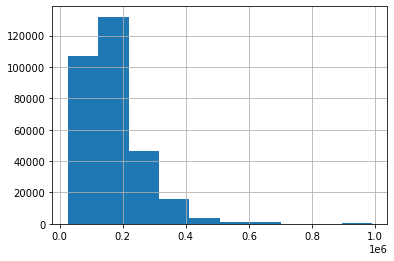

In [10]:
# boolean indexing 으로 filtering 적용 
app_train[app_train['AMT_INCOME_TOTAL'] < 1000000]['AMT_INCOME_TOTAL'].hist()

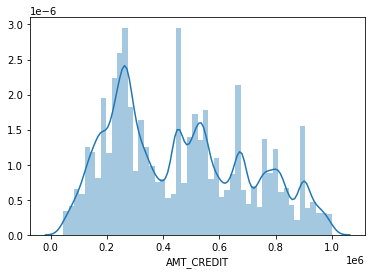

In [11]:
# distplot으로 histogram 표현 
sns.distplot(app_train[app_train['AMT_CREDIT'] < 1000000]['AMT_CREDIT'])

#### TARGET 값에 따른 AMT_INCOME_TOTAL값 분포도 비교
* distplot과 violinplot 시각화
* plt.subplots() 기반으로 seaborn의 distplot과 violinplot으로 분포도 비교 시각화

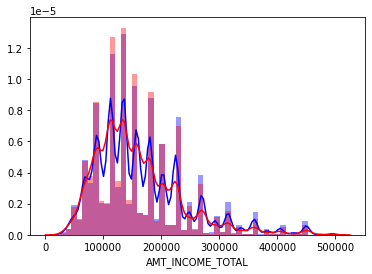

In [12]:
# TARGET값에 따른 Filtering 조건 각각 설정. 
cond1 = (app_train['TARGET'] == 1)
cond0 = (app_train['TARGET'] == 0)
# AMT_INCOME_TOTAL은 매우 큰 값이 있으므로 이는 제외.
cond_amt = (app_train['AMT_INCOME_TOTAL'] < 500000)
# distplot으로 TARGET=1이면 빨간색으로, 0이면 푸른색으로 Histogram 표현 
sns.distplot(app_train[cond0 & cond_amt]['AMT_INCOME_TOTAL'], label='0', color='blue')
sns.distplot(app_train[cond1 & cond_amt]['AMT_INCOME_TOTAL'], label='1', color='red')

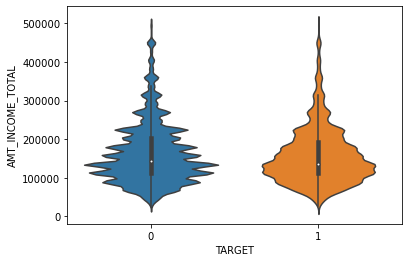

In [13]:
# violinplot을 이용하면 Category 값별로 연속형 값의 분포도를 알수 있음. x는 category컬럼, y는 연속형 컬럼 
sns.violinplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train[cond_amt])

In [ ]:
# 2개의 subplot을 생성
fig, axs = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)

In [ ]:
# TARGET 값 유형에 따른 Boolean Indexing 조건
cond1 = (app_train['TARGET'] == 1)
cond0 = (app_train['TARGET'] == 0)
cond_amt = (app_train['AMT_INCOME_TOTAL'] < 500000)
# 2개의 subplot을 생성하고  왼쪽에는 violinplot을 오른쪽에는 distplot을 표현
fig, axs = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, squeeze=False)
# violin plot을 왼쪽 subplot에 그림. 
sns.violinplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train[cond_amt], ax=axs[0][0] )
# Histogram을 오른쪽 subplot에 그림. 
sns.distplot(app_train[cond0 & cond_amt]['AMT_INCOME_TOTAL'], ax=axs[0][1], label='0', color='blue')
sns.distplot(app_train[cond1 & cond_amt]['AMT_INCOME_TOTAL'], ax=axs[0][1], label='1', color='red')

In [ ]:
def show_column_hist_by_target(df, column, is_amt=False):    
    cond1 = (df['TARGET'] == 1)
    cond0 = (df['TARGET'] == 0)

    fig, axs = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, squeeze=False)
    # is_amt가 True이면 < 500000 조건으로 filtering
    cond_amt = True
    if is_amt:
        cond_amt = df[column] < 500000
    
    sns.violinplot(x='TARGET', y=column, data=df[cond_amt], ax=axs[0][0] )
    sns.distplot(df[cond0 & cond_amt][column], ax=axs[0][1], label='0', color='blue')
    sns.distplot(df[cond1 & cond_amt][column], ax=axs[0][1], label='1', color='red')

show_column_hist_by_target(app_train, 'AMT_INCOME_TOTAL', is_amt=True)

#### app_train과 app_test를 합쳐서 한번에 데이터 preprocessing 수행. 

In [ ]:
app_train.shape, app_test.shape

In [ ]:
# pandas의 concat()을 이용하여 app_train과 app_test를 결합
apps = pd.concat([app_train, app_test])
apps.shape

In [ ]:
# app_train의 TARGET 값을 Null로 입력됨. 
apps['TARGET'].value_counts(dropna=False)

#### Object feature들을 Label Encoding
* pandas의 factorize()를 이용

In [ ]:
apps.info()

In [ ]:
# pd.factorize()는 편리하게 Category 컬럼을 Label인코딩 수행. 
# pd.factorize(Category컬럼 Series)는 Label인코딩된 Series와 uniq한 Category값을 반환함. [0]을 이용하여 Label인코딩 Series만 취함. 
apps['CODE_GENDER'] = pd.factorize(apps['CODE_GENDER'])[0]

In [ ]:
# Label 인코딩을 위해 object 유형의 컬럼만 추출 
object_columns = apps.dtypes[apps.dtypes == 'object'].index.tolist()

In [ ]:
object_columns

In [ ]:
# pd.factorize()는 한개의 컬럼만 Label 인코딩이 가능하므로 object형 컬럼들을 iteration하면서 변환 수행. 
for column in object_columns:
    apps[column] = pd.factorize(apps[column])[0]

In [ ]:
apps.info()

#### Null값 일괄 변환

In [ ]:
apps.isnull().sum().head(100)

In [ ]:
# -999로 모든 컬럼들의 Null값 변환
apps = apps.fillna(-999)

In [ ]:
apps.isnull().sum().head(100)

#### 학습 데이터와 테스트 데이터 다시 분리

In [ ]:
# app_test의 TARGET 컬럼은 원래 null이었는데 앞에서 fillna(-999)로 -999로 변환됨. 이를 추출함. 
app_train = apps[apps['TARGET'] != -999]
app_test = apps[apps['TARGET']== -999]
app_train.shape, app_test.shape

In [ ]:
# app_test의 TARGET컬럼을 Drop
app_test = app_test.drop('TARGET', axis=1)

In [ ]:
app_test.shape

In [ ]:
app_test.dtypes

#### 학습 데이터를 검증 데이터로 분리하고 LGBM Classifier로 학습 수행. 
* 피처용 데이터와 타겟 데이터 분리
* 학습용/검증용 데이터 세트 분리

In [ ]:
ftr_app = app_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = app_train['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=2020)
train_x.shape, valid_x.shape

In [ ]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        subsample=0.8,
        max_depth=12,
        silent=-1,
        verbose=-1
        )

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
eval_metric= 'auc', verbose= 100, early_stopping_rounds= 50)

##### Feature importance 시각화 

In [ ]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32))

#### 학습된 Classifier를 이용하여 테스트 데이터을 예측하고 결과를 Kaggle로 Submit 수행. 

In [ ]:
#학습된 classifier의 predict_proba()를 이용하여 binary classification에서 1이될 확률만 추출
preds = clf.predict_proba(app_test.drop(['SK_ID_CURR'], axis=1))[:, 1 ]

In [ ]:
# app_test의 TARGET으로 1이될 확률 Update
app_test['TARGET'] = preds
app_test['TARGET'].head(10)

In [ ]:
# SK_ID_CURR과 TARGET 값만 csv 형태로 생성. 
app_test[['SK_ID_CURR', 'TARGET']].to_csv('app_baseline_01.csv', index=False)

In [ ]:
!ls 